In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/fer2013.csv')

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
#X_train, y_train = get_images('Training')
X_test, y_test =  get_images('PublicTest')
#X_validate, y_validate = get_images('PrivateTest')

In [ ]:
def get_images(usage):
  df = dataset[dataset['Usage'] == usage]
  y = tf.keras.utils.to_categorical(df['emotion'])
  X = np.array([values.split() for values in df['pixels']])
  X = X.astype(np.float).reshape(len(df), 48, 48, 1)
  return (X, y)

In [ ]:
# print('X_train:', X_train.shape)
# print('y_train:', y_train.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

# print('X_validate:', X_validate.shape)
# print('y_validate:', y_validate.shape)

X_test: (3589, 48, 48, 1)
y_test: (3589, 7)


In [ ]:
model1_fer = tf.keras.models.load_model('/content/drive/My Drive/BE_Project_Final_models/fer_models/model_fer_1_withaug.h5')
model2_fer = tf.keras.models.load_model('/content/drive/My Drive/BE_Project_Final_models/fer_models/model_fer_2 with aug.h5')
model_dex_fer = tf.keras.models.load_model('/content/drive/My Drive/BE_Project_Final_models/fer_models/model_dex_fer.h5')
model_simple_batch=tf.keras.models.load_model('/content/drive/My Drive/BE_Project_Final_models/fer_models/simple_model_batchnorm_fer.h5')
model_simple_layer=tf.keras.models.load_model('/content/drive/My Drive/BE_Project_Final_models/fer_models/simple_model_layernorm_fer.h5')

In [ ]:
test_data = X_test.astype('float32')
test_data_scaled=test_data/255

In [ ]:


test_datagen = ImageDataGenerator(rescale=1. / 255)



test_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1. / 255)



test_generator = test_datagen.flow(test_data,y_test)

In [ ]:
test_generator.classes

AttributeError: ignored

In [ ]:
labels = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}


In [ ]:
#Confution Matrix and Classification Report
Y_pred = model_simple_layer.predict(test_data_scaled)
#y_pred = np.argmax(Y_pred, axis=1)


In [ ]:
print(Y_pred)

[[3.67473513e-01 4.67395782e-03 2.08665878e-01 ... 1.92609355e-01
  6.09991886e-03 2.04993755e-01]
 [1.21548839e-01 9.28513426e-03 9.91598219e-02 ... 1.50056556e-01
  1.92544144e-02 3.64593446e-01]
 [3.62603664e-01 9.15280636e-03 8.62428471e-02 ... 3.03994864e-01
  7.63491914e-03 2.29838803e-01]
 ...
 [8.00391361e-02 6.31984696e-03 1.19015649e-01 ... 3.83218676e-01
  3.16156074e-02 2.54295766e-01]
 [2.59602338e-01 1.17431348e-02 1.17573336e-01 ... 2.62731999e-01
  4.65178750e-02 2.65581071e-01]
 [6.47860095e-02 3.02736036e-04 3.09824824e-01 ... 3.10266405e-01
  4.75275554e-02 2.66529858e-01]]


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
y_pred

array([4, 3, 0, ..., 4, 6, 6])

In [ ]:
y_pred.shape

(3589,)

In [ ]:
y_test_new = np.argmax(y_test, axis=1)
print(y_test_new)
print(y_test_new.shape)

[0 1 4 ... 4 4 4]
(3589,)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
print('Confusion Matrix')
cnf=confusion_matrix(y_test_new, y_pred)
print(cnf)
print('Classification Report')
target_names = ['Angry', 'Disgust', 'Fear','Happy','Sad','Surprise','Neutral']
clf=classification_report(y_test_new, y_pred, target_names=target_names)

Confusion Matrix
[[232   3  43  48  56  20  65]
 [ 29   6   6   4   5   0   6]
 [ 78   0 128  42 108  57  83]
 [ 32   0  26 750  23  18  46]
 [ 88   0  61  79 261  14 150]
 [ 13   1  45  25  13 295  23]
 [ 64   0  36  82  87  10 328]]
Classification Report


In [ ]:
# plt.rcParams.update({'text.color': 'black','font.size':15})

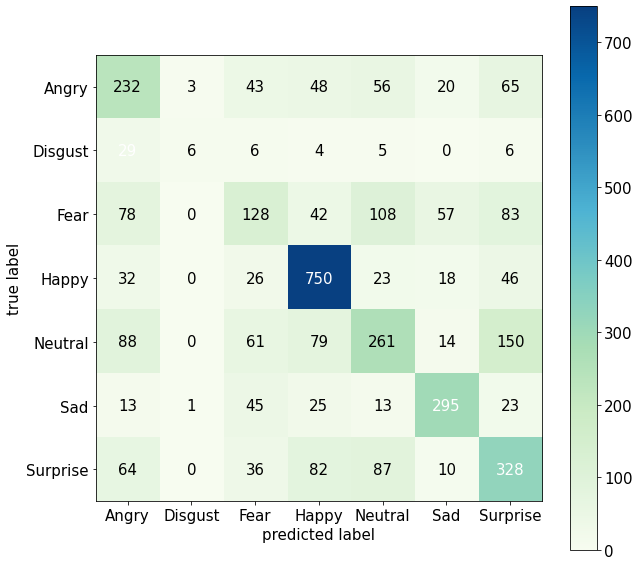

              precision    recall  f1-score   support

       Angry       0.43      0.50      0.46       467
     Disgust       0.60      0.11      0.18        56
        Fear       0.37      0.26      0.30       496
       Happy       0.73      0.84      0.78       895
         Sad       0.47      0.40      0.43       653
    Surprise       0.71      0.71      0.71       415
     Neutral       0.47      0.54      0.50       607

    accuracy                           0.56      3589
   macro avg       0.54      0.48      0.48      3589
weighted avg       0.55      0.56      0.55      3589



In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=cnf,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,figsize=(10,10),cmap='GnBu')
ax.set_xticklabels([''] + list(np.unique(target_names)))
ax.set_yticklabels([''] + list(np.unique(target_names)))

plt.show()
print(clf)

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

NameError: ignored